The goal of this notebook is to examine word frequency in the haiku dataset in a more qualitative and subjective manner.

The intent is to build a word cloud not only for all of the words in the corpus, but also for

* flowers
* colors
* animals

In [1]:
# Automagically reimport haikulib if it changes.
%load_ext autoreload
%autoreload 2

from collections import Counter

from IPython.display import Image
from wordcloud import WordCloud

from haikulib import data, nlp, utils
from haikulib.eda import colors

data_dir = data.get_data_dir() / "experiments" / "eda" / "word_clouds"
data_dir.mkdir(parents=True, exist_ok=True)

# Word Cloud with Stop Words

If we build the word cloud without removing stop words, the results are less illuminating.

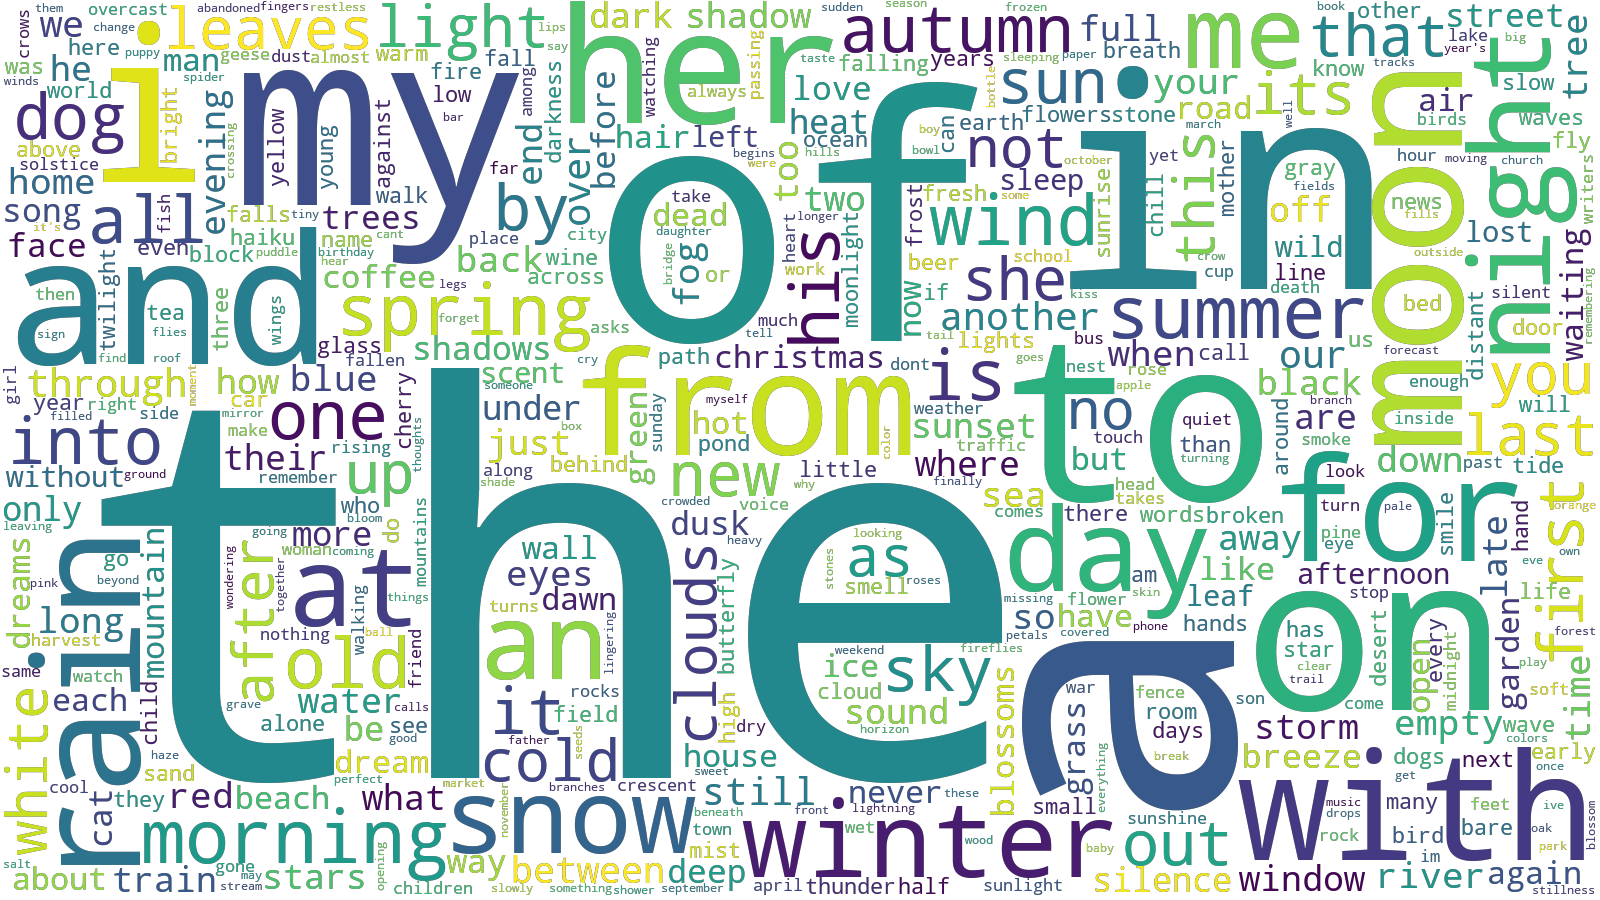

In [2]:
bag = data.get_bag_of("words")
wordcloud = WordCloud(
    max_words=500, width=1600, height=900, mode="RGBA", background_color=None
).generate_from_frequencies(bag)

wordcloud.to_file(data_dir / "all-words.png")
# Render generated image at full resolution in a manner that doesn't cache the images.
Image(data_dir / "all-words.png")

# Word Cloud without Stop Words

However, once all of the stop words are removed, we begin to see more interesting results.

As it was put to me, the results are quite stereotypical, but then stereotypes exist for a reason, and in this particular case they seem to be supported by evidence.

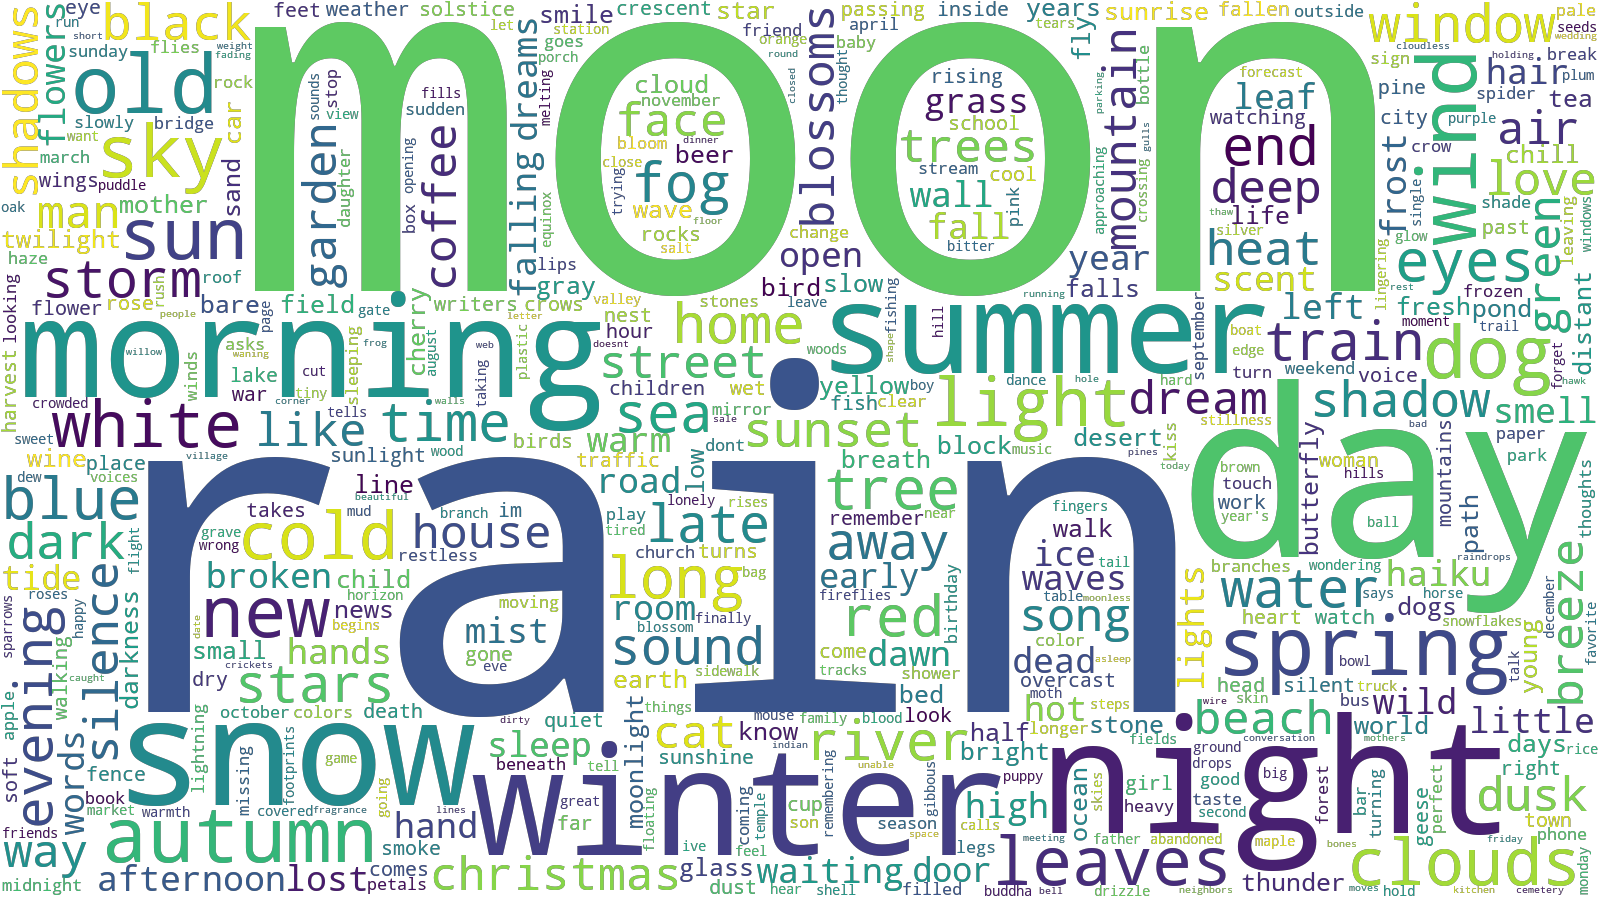

In [3]:
bag = {k: v for k, v in bag.items() if k not in nlp.STOPWORDS}

wordcloud = WordCloud(
    max_words=500, width=1600, height=900, mode="RGBA", background_color=None
).generate_from_frequencies(bag)

wordcloud.to_file(data_dir / "without-stopwords.png")
Image(data_dir / "without-stopwords.png")

# Parsing the Haiku Corpus for Specific n-Grams

In order to build correct (for some definition of correct) word clouds of flower, color, and animal occurences, it's necessary to parse and find occurances of the multi-word tokens in the haiku corpus.

The bag-of-words representation of the dataset is not the appropriate representation for finding ngrams.
So we proceed by building a different representation of the haiku corpus, and then count ngrams of sizes 1, 2, and 3 that occur in the sets of color, flora, and fauna names.

In [4]:
# Form a list of haiku without the `/` and `#` symbols.
df = data.get_df()
corpus = []

for haiku in df["haiku"]:
    corpus.append(" ".join(line.strip(" #") for line in haiku.split("/")))

flower_names = data.get_flowers()
animal_names = data.get_animals()

color_counts = Counter()
color_values = dict()
_df = colors.get_color_counts()
for _, row in _df.iterrows():
    color = row["color"]
    color_counts[color] = row["count"]
    color_values[color] = row["html_color"]

In [5]:
%%time
flowers = Counter()
animals = Counter()

for haiku in corpus:
    # Update the counts for this haiku.
    flowers.update(
        nlp.count_tokens_from(haiku, flower_names, ngrams=[1, 2, 3])
    )
    animals.update(
        nlp.count_tokens_from(haiku, animal_names, ngrams=[1, 2, 3])
    )

CPU times: user 1.38 s, sys: 1.08 ms, total: 1.39 s
Wall time: 1.38 s


# Flora Word Cloud

There are a large amount of flora mentioned in the haiku, so I thought it would be entertaining to look at a word cloud of flowers and trees mentioned in the corpus.

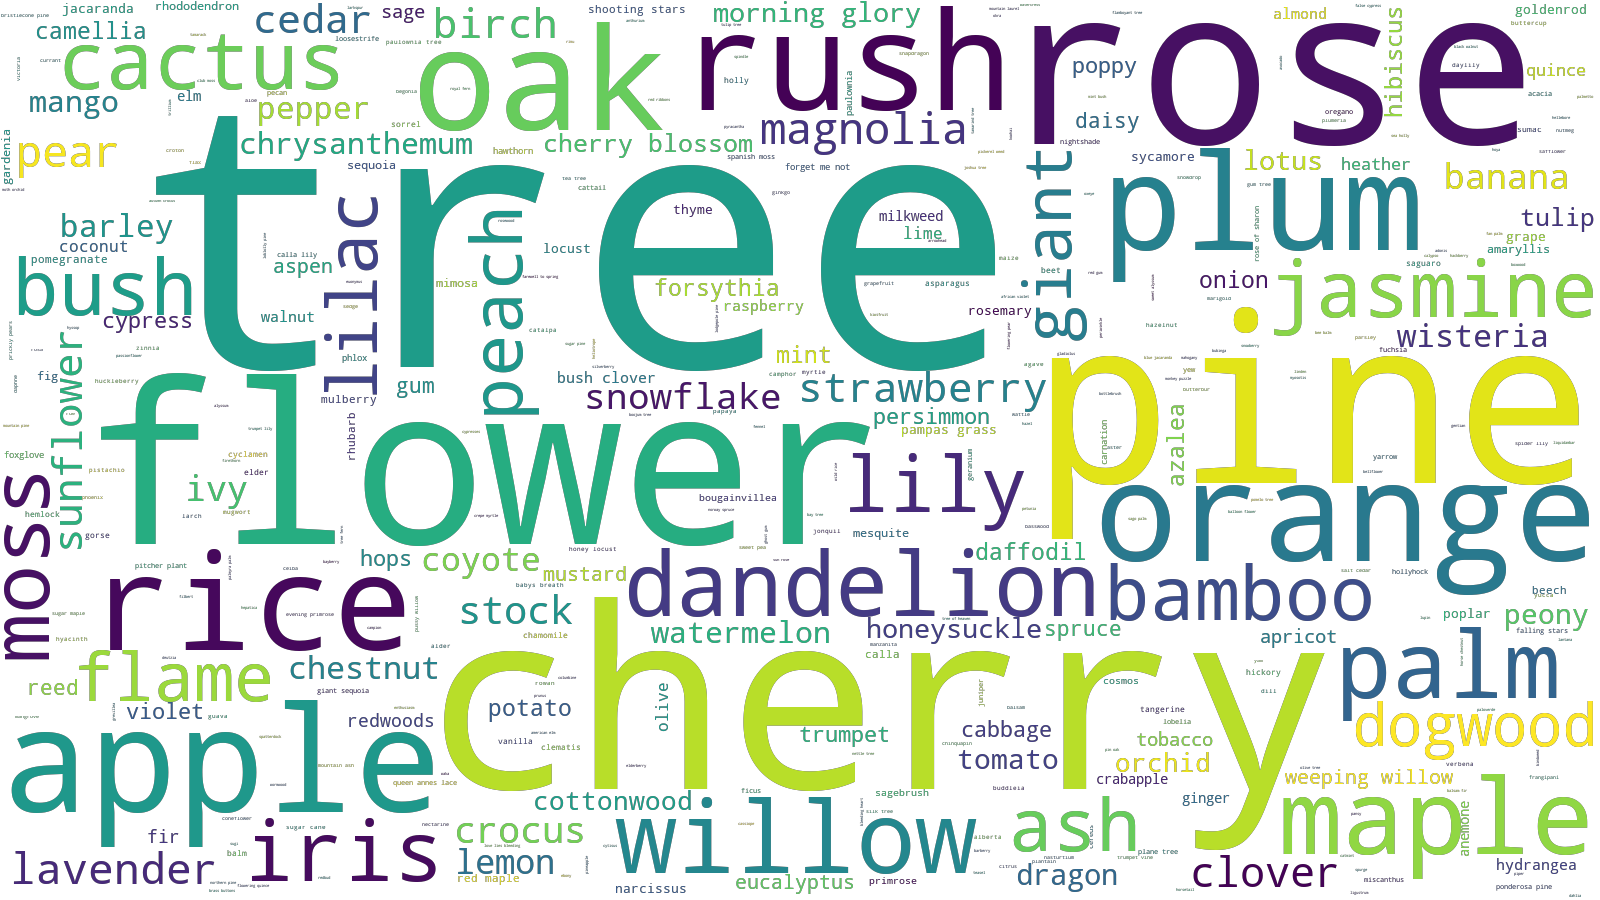

In [6]:
wordcloud = WordCloud(
    max_words=500, width=1600, height=900, mode="RGBA", background_color=None
).generate_from_frequencies(flowers)

wordcloud.to_file(data_dir / "flora.png")
Image(data_dir / "flora.png")

# Color Word Cloud

One of the most interesting and unexpected applications of programming that I have found was a PyCon 2017 conference talk titled [Gothic Colors Using Python to understand color in nineteenth century literature](https://www.youtube.com/watch?v=3dDtACSYVx0).
This was the first application of programming to a soft science that I recall having been exposed to, and it's made a lasting impression.

Ever since watching the talk, I've wanted to apply scientific techniques to solve non-scientific problems.

I still intend on producing a color palette for haiku, but in the mean time, a word cloud of color names will do.
The color names and their RGB values have been taken from [https://xkcd.com/color/rgb/](https://xkcd.com/color/rgb/).

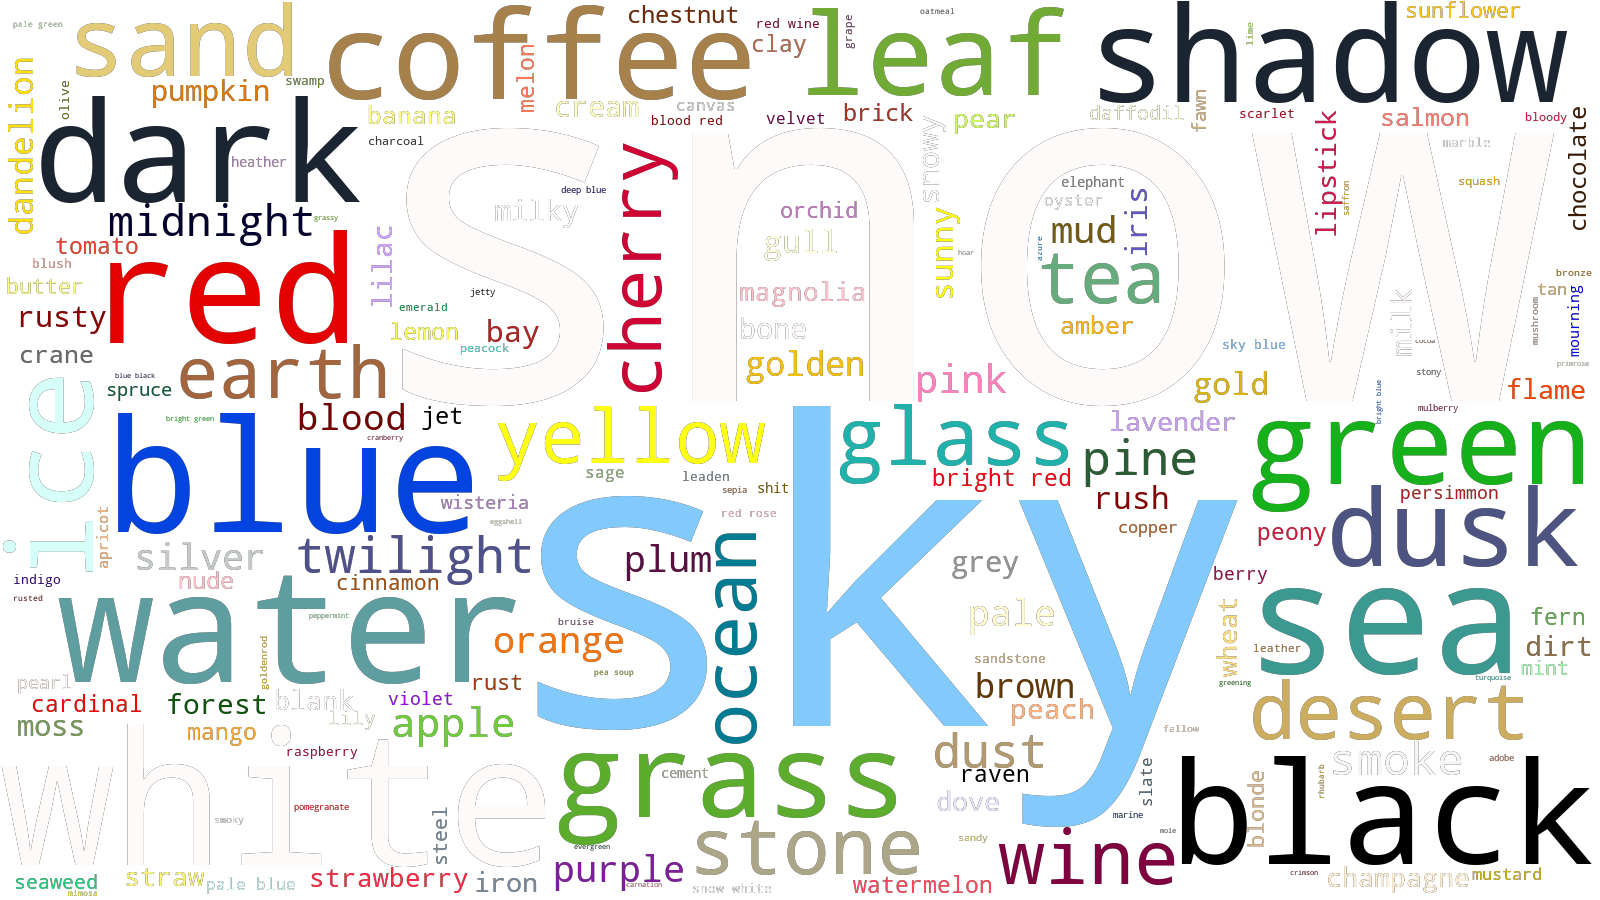

In [9]:
def color_words(word, *args, **kwargs):
    # Black on a black background doesn't look so hot.
    rgb = color_values[word]
    if word in {"white", "blank", "milk", "bone"}:
        rgb = color_values["snow"]
    elif color in {"black", "shadow"}:
        rgb = color_values["dark"]
        
    return rgb

wordcloud = WordCloud(
    max_words=500,
    width=1600,
    height=900,
    mode="RGBA",
    background_color=None,
    min_font_size=7,
    color_func=color_words
).generate_from_frequencies(color_counts)

wordcloud.to_file(data_dir / "colors.png")
Image(data_dir / "colors.png")

# Fauna Word Cloud

A host of flora and fauna are mentioned in the haiku dataset, so I want to produce a word cloud for animals mentioned in haiku as well.

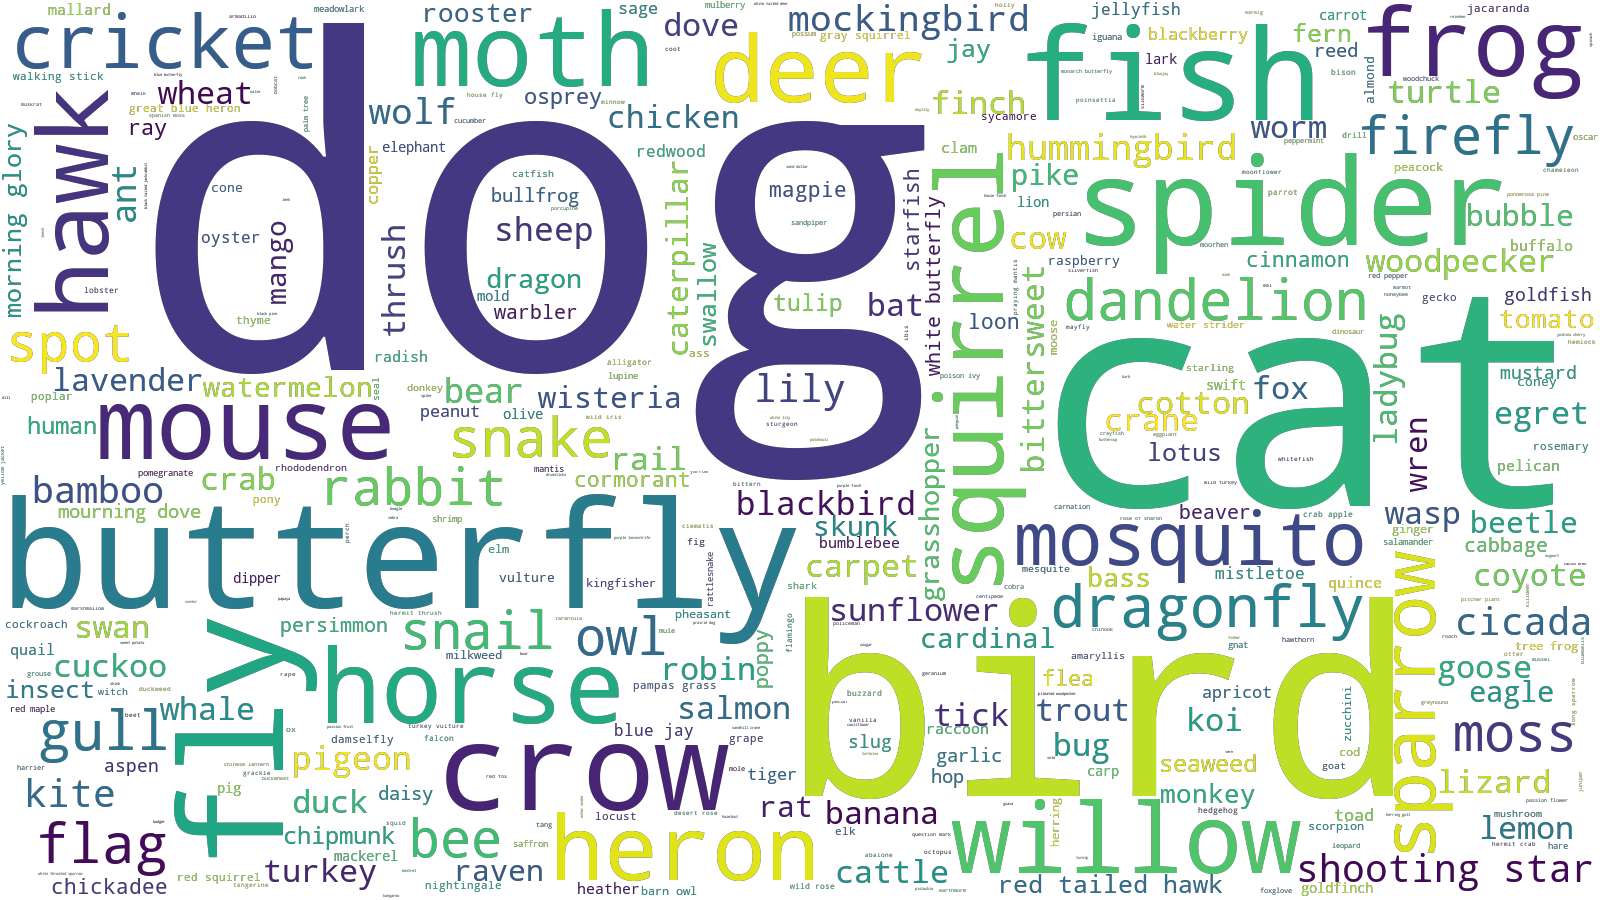

In [8]:
wordcloud = WordCloud(
    max_words=500, width=1600, height=900, mode="RGBA", background_color=None
).generate_from_frequencies(animals)

wordcloud.to_file(data_dir / "fauna.png")
Image(data_dir / "fauna.png")